In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import autocorrelation_plot
from catboost import CatBoostRegressor as cbr
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_csv('dataset.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
ts = data['target']

In [3]:
ts

timestamp
2022-03-01      94
2022-03-02     228
2022-03-03     615
2022-03-04     620
2022-03-05     626
              ... 
2023-06-30    1097
2023-07-01    1005
2023-07-02    1102
2023-07-03    1066
2023-07-04     152
Name: target, Length: 491, dtype: int64

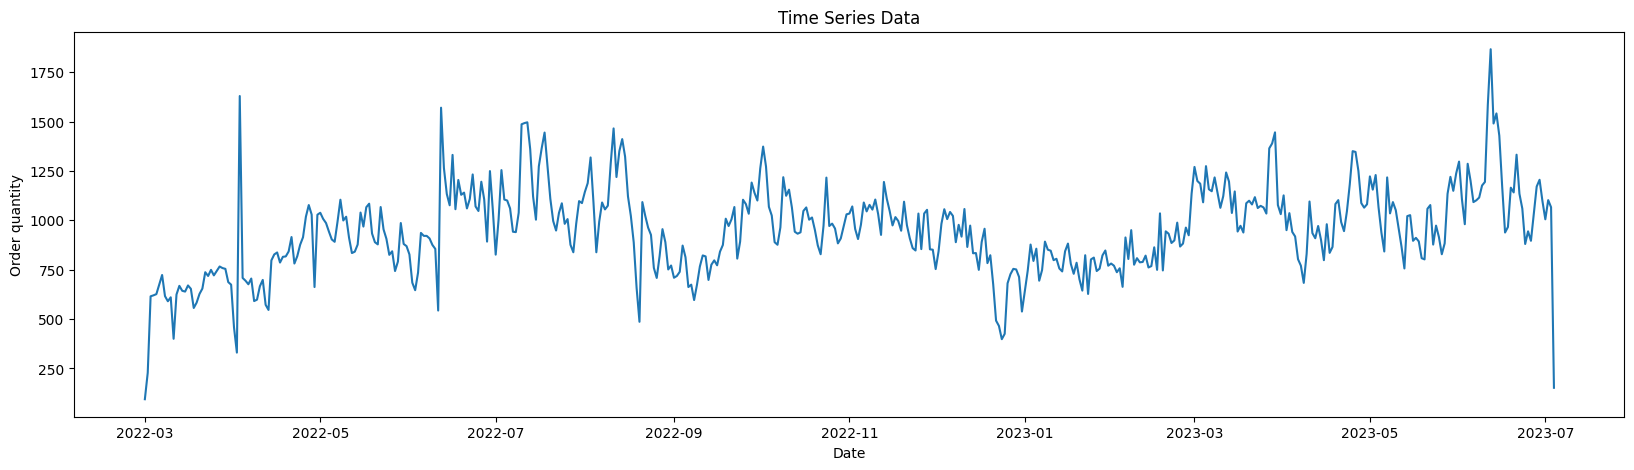

In [4]:
# Plot the time series data
plt.figure(figsize=(20, 5))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Order quantity')
plt.show()

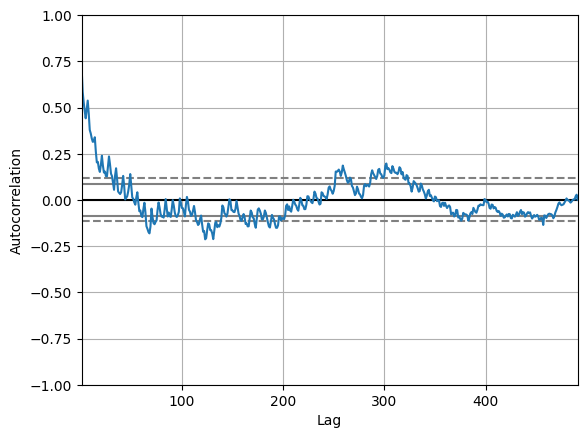

<Figure size 2000x500 with 0 Axes>

In [5]:
autocorrelation_plot(ts)
plt.figure(figsize=(20, 5))
plt.show()

In [7]:
# Check for stationarity
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If not stationary, perform differencing
d = 1  # Order of differencing
ts_diff = ts.diff(periods=d).dropna()

ADF Statistic: -3.8059976158984044
p-value: 0.0028465441858441685
Critical Values: {'1%': -3.4439899743408136, '5%': -2.8675550551408353, '10%': -2.569973792117904}


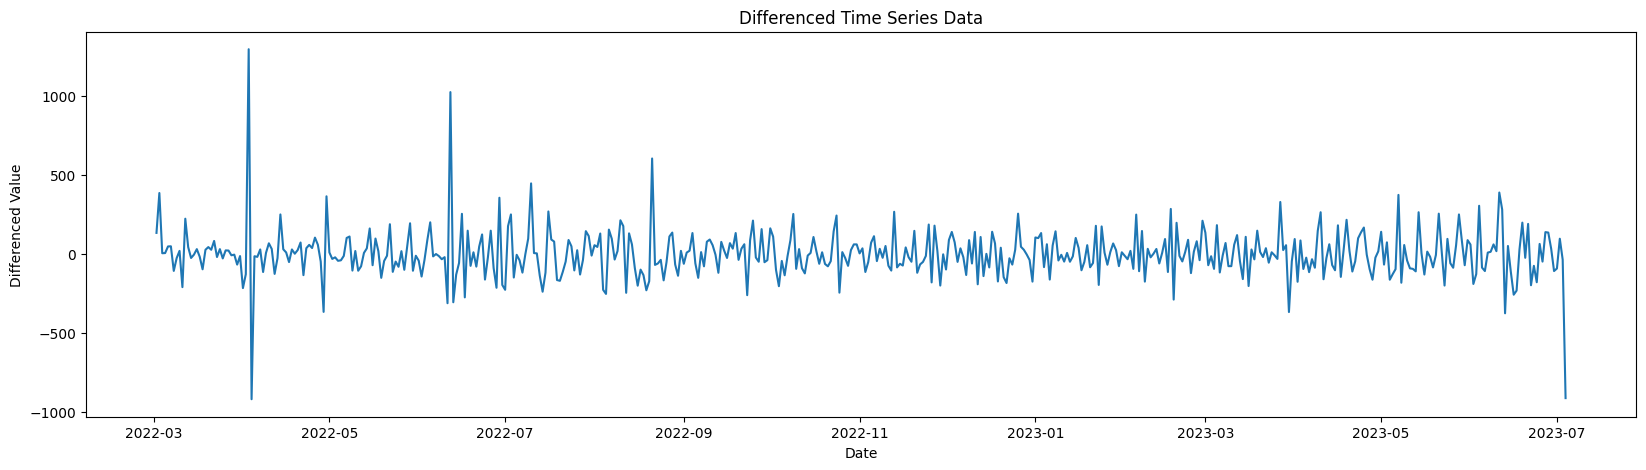

In [8]:
# Plot the differenced data
plt.figure(figsize=(20, 5))
plt.plot(ts_diff)
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.show()

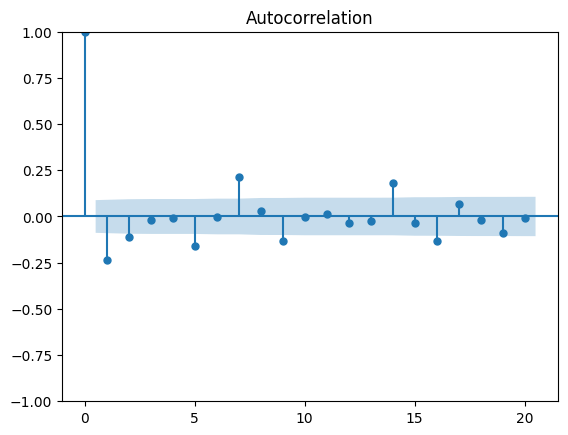

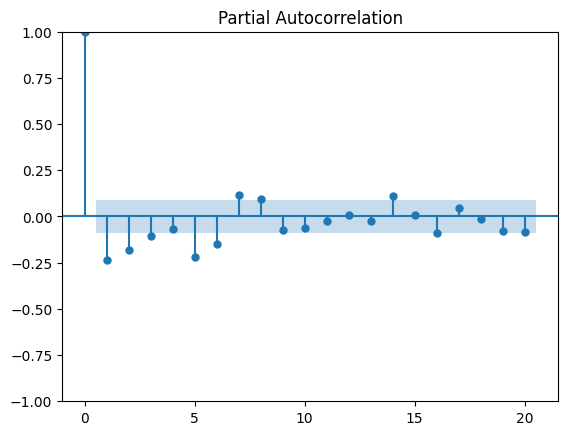

In [9]:
# Determine the order of ARIMA (p, d, q)
# Plot ACF and PACF
plot_acf(ts_diff, lags=20)
plot_pacf(ts_diff, lags=20)
plt.show()


In [11]:
train, test = train_test_split(ts, test_size=0.2, shuffle=False)
test

timestamp
2023-03-28    1389
2023-03-29    1445
2023-03-30    1077
2023-03-31    1031
2023-04-01    1126
              ... 
2023-06-30    1097
2023-07-01    1005
2023-07-02    1102
2023-07-03    1066
2023-07-04     152
Name: target, Length: 99, dtype: int64

/Users/evidentbackend/.local/share/virtualenvs/mye-order-prediction-service-R-2NzdQ6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/evidentbackend/.local/share/virtualenvs/mye-order-prediction-service-R-2NzdQ6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/evidentbackend/.local/share/virtualenvs/mye-order-prediction-service-R-2NzdQ6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 target   No. Observations:                  392
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -2510.944
Date:                Wed, 27 Sep 2023   AIC                           5037.889
Time:                        15:00:01   BIC                           5069.659
Sample:                    03-01-2022   HQIC                          5050.480
                         - 03-27-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        918.9634     25.319     36.296      0.000     869.340     968.587
ma.L1          0.6652      0.029     23.209      0.000       0.609       0.721
ma.L2          0.6049      0.049     12.295      0.0

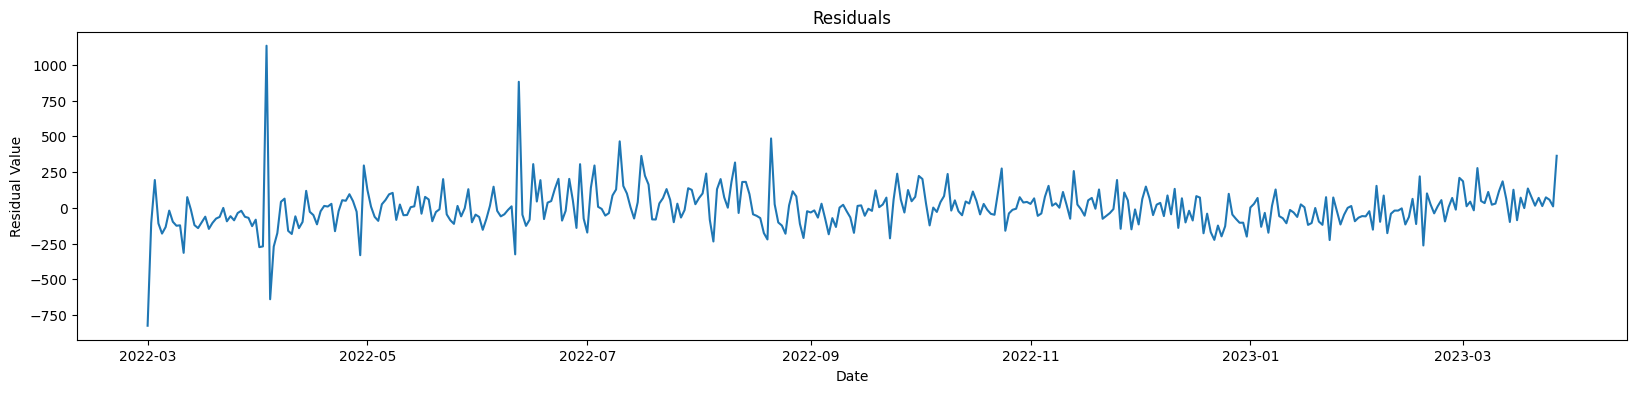

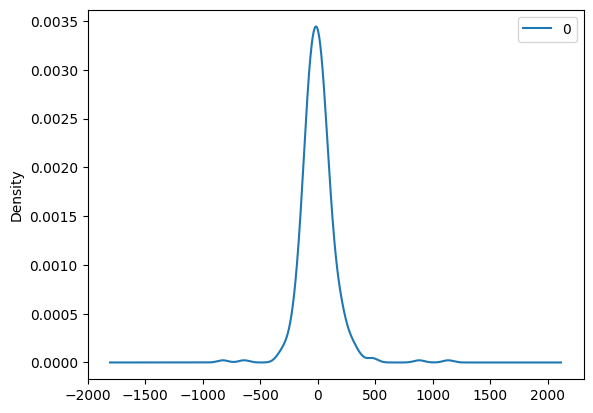

                 0
count   392.000000
mean      0.415209
std     149.625912
min    -824.963410
25%     -76.956392
50%      -8.321484
75%      67.119398
max    1134.095473


In [27]:
# Train the ARIMA model
p = 0  # AutoRegressive order
q = 6  # Moving Average order
model = ARIMA(train, order=(p, 0, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(20, 4))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [19]:
# Forecast future values
n_forecast = len(test)  # Number of steps ahead to forecast
predictions = list()

model_fit.plot_predict(dynamic=False)
plt.show()
# forecast = model_fit.forecast(steps=n_forecast)
# yhat = forecast
# print(yhat)
# predictions.extend(yhat)
# # print('predicted=%f' % (yhat))


# # Plot the forecasted values
# plt.figure(figsize=(20, 6))
# plt.plot(test, label='Observed')
# plt.plot(pd.date_range(start=test.index[-1], periods=n_forecast), forecast, label='Forecast', color='red')
# plt.title('ARIMA Forecast')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

Test RMSE: 231.947


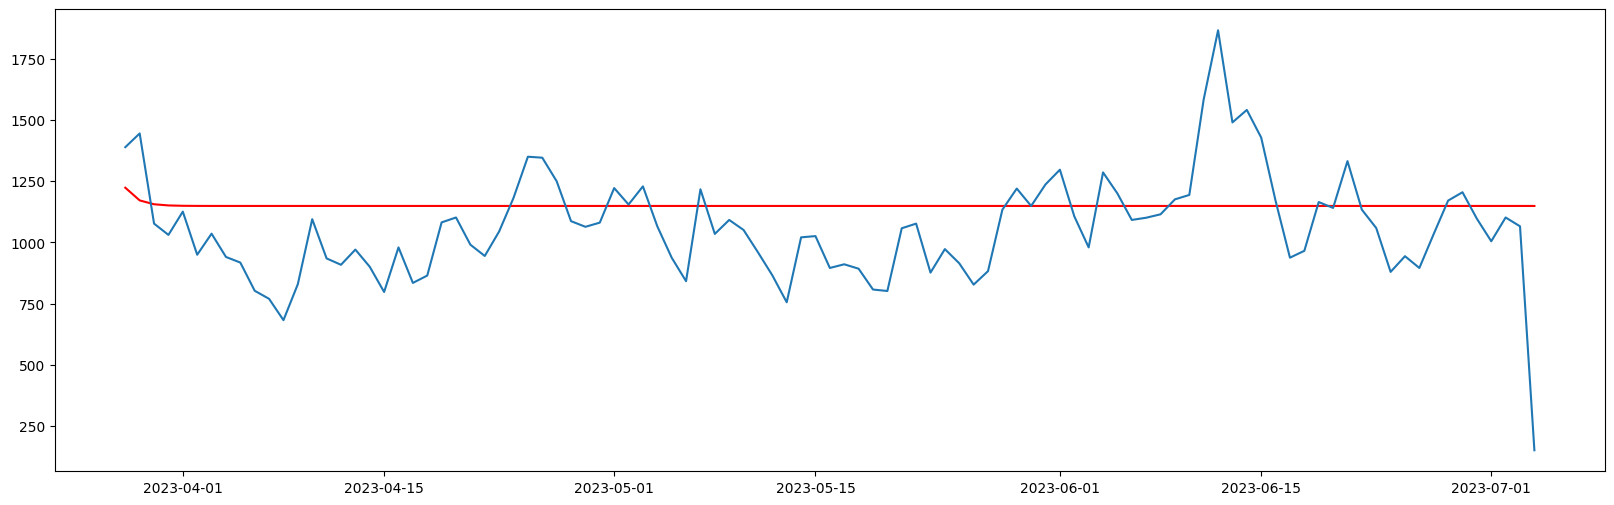

In [17]:
from sklearn.metrics import mean_squared_error
# evaluate forecasts
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(20, 6))
plt.plot(yhat, color='red')
plt.plot(test)
# plt.plot(predictions, color='red')
plt.show()

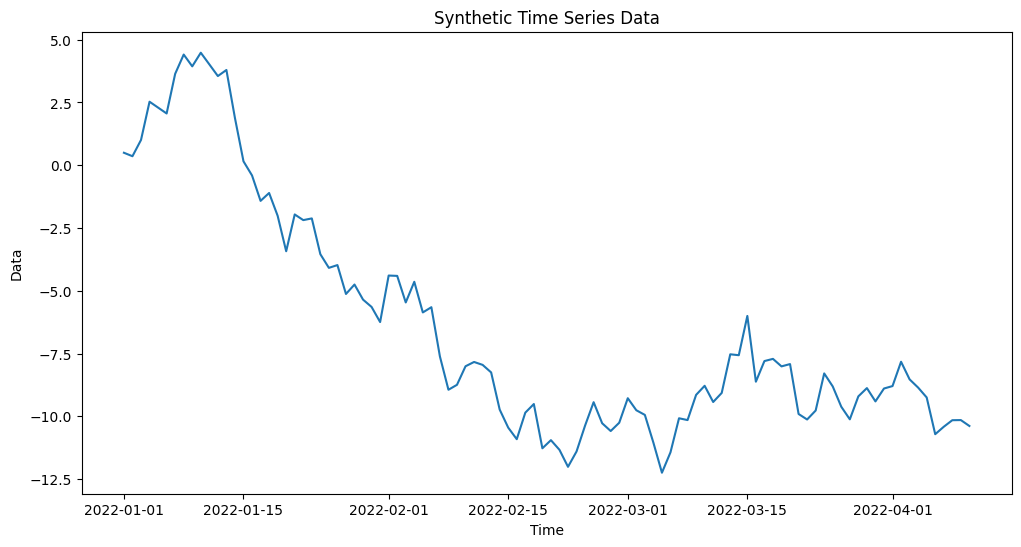

<Figure size 1200x600 with 0 Axes>

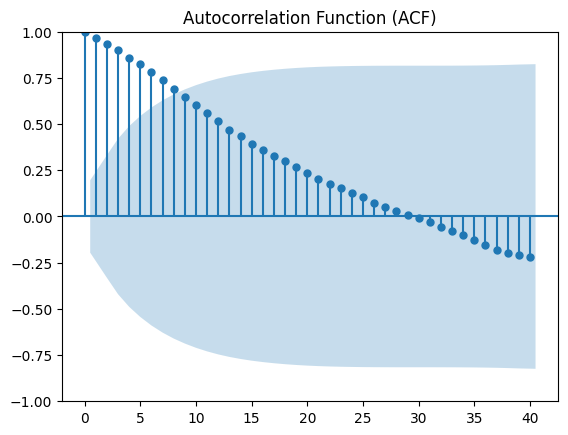

<Figure size 1200x600 with 0 Axes>

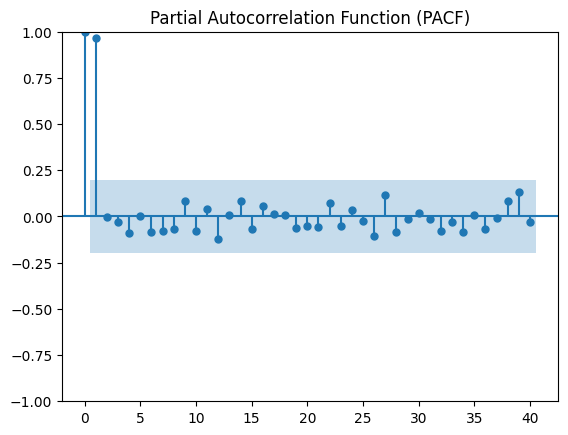

/Users/evidentbackend/.local/share/virtualenvs/mye-order-prediction-service-R-2NzdQ6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/evidentbackend/.local/share/virtualenvs/mye-order-prediction-service-R-2NzdQ6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/evidentbackend/.local/share/virtualenvs/mye-order-prediction-service-R-2NzdQ6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Data   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.425
Date:                Wed, 27 Sep 2023   AIC                            268.850
Time:                        14:07:38   BIC                            276.635
Sample:                    01-01-2022   HQIC                           272.000
                         - 04-10-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3998      5.646      0.071      0.944     -10.667      11.466
ma.L1         -0.4158      5.588     -0.074      0.941     -11.369      10.537
sigma2         0.8329      0.123      6.780      0.0

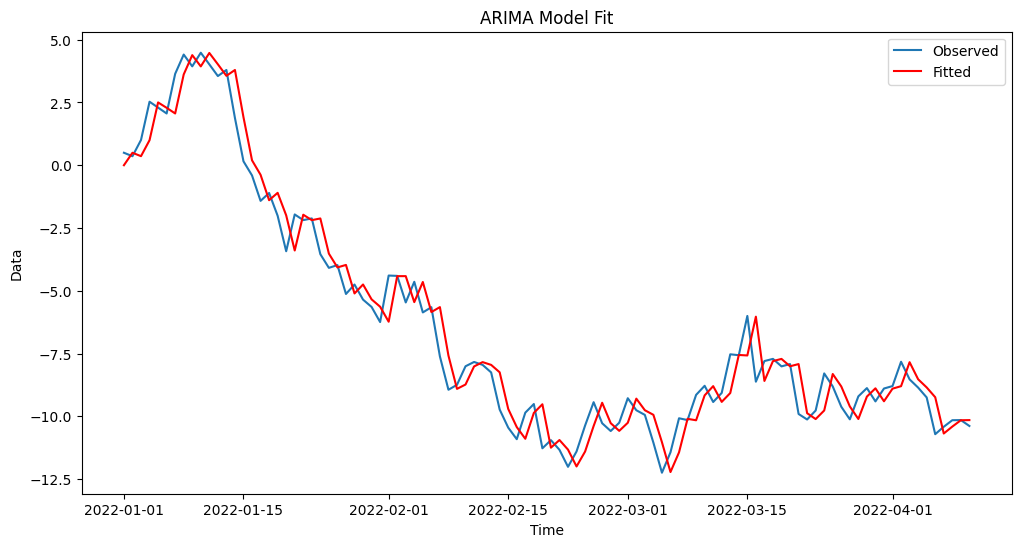

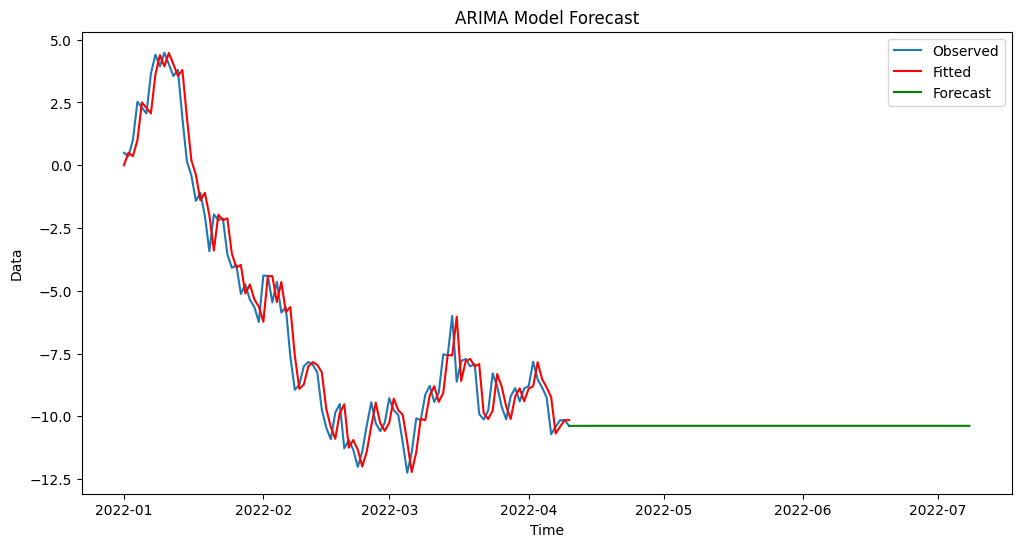

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate a synthetic time series data
np.random.seed(42)
time = pd.date_range(start="2022-01-01", periods=100, freq="D")
data = np.cumsum(np.random.randn(100))  # Random walk

# Create a pandas DataFrame
df = pd.DataFrame({'Time': time, 'Data': data})
df.set_index('Time', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Synthetic Time Series Data')
plt.show()

# Plot ACF and PACF to determine p and q values
plt.figure(figsize=(12, 6))
plot_acf(df['Data'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Data'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit an ARIMA model (p, d, q)
p = 1  # AR order
d = 1  # Integration order (differencing)
q = 1  # MA order
model = ARIMA(df['Data'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], label='Observed')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('ARIMA Model Fit')
plt.legend()
# plt.show()

# Make forecasts
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], label='Observed')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps), forecast, label='Forecast', color='green')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()
